# Exploring NYC Public School Test Result Scores

### [Which NYC schools have the best math results?](#id_1) 
* The best math results are at least 80% of the ***maximum possible score of 800*** for math.
* Save your results in a pandas DataFrame called ***``best_math_schools``***, including:
    * ``"school_name"`` and
    * ``"average_math"`` columns,
    * sorted by ``"average_math"`` in **descending order**.


### [What are the top 10 performing schools based on the combined SAT scores?](#id_2)
* Save your results as a pandas DataFrame called ***top_10_schools*** containing:
    * ``"school_name"`` and
    * a new column named ``"total_SAT"``,
    * with results ordered by ``"total_SAT"`` in descending order.


### [Which single borough has the largest standard deviation in the combined SAT score?](#id_3)
* Save your results as a pandas DataFrame called ***largest_std_dev***.
* The DataFrame should contain one row, with:
    * ``"borough"`` - the name of the NYC borough with the largest standard deviation of ``"total_SAT"``.
    * ``"num_schools"`` - the number of schools in the borough.
    * ``"average_SAT"`` - the mean of "total_SAT".
    * ``"std_SAT"`` - the standard deviation of ``"total_SAT"``.

Round all numeric values to two decimal places.

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [1]:
# Re-run this cell 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


# Pre-processing

In [2]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [3]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [4]:
schools.describe(include=['O'])

,school_name,borough,building_code
count,375,375,375
unique,375,5,233
top,"New Explorations into Science, Technology and ...",Brooklyn,X425
freq,1,109,6


## Data Wrangling

In [5]:
print(schools['borough'].unique())

['Manhattan' 'Staten Island' 'Bronx' 'Queens' 'Brooklyn']


In [6]:
schools[schools['percent_tested'].isna()]

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
19,Urban Assembly School of Business for Young Women,Manhattan,M282,418,420,417,NaN
38,High School of Hospitality Management,Manhattan,M535,451,433,424,NaN
57,Frederick Douglass Academy II Secondary School,Manhattan,M088,390,384,373,NaN
76,Jacqueline Kennedy Onassis High School,Manhattan,M486,418,422,415,NaN
95,Tottenville High School,Staten Island,R455,494,476,476,NaN
114,Bronx International High School,Bronx,X400,355,330,320,NaN
133,West Bronx Academy for the Future,Bronx,X435,404,383,378,NaN
152,Bronx High School for the Visual Arts,Bronx,X839,408,428,404,NaN
171,Kingsbridge International High School,Bronx,X430,366,311,310,NaN


Empty values of the column ``'percent_tested'`` will be filled with the mean value of the ``'borough'``

In [7]:
per_test_mean=schools.groupby('borough')['percent_tested'].mean()
print(per_test_mean)

borough
Bronx            58.653763
Brooklyn         62.640385
Manhattan        71.390476
Queens           69.313846
Staten Island    66.111111
Name: percent_tested, dtype: float64


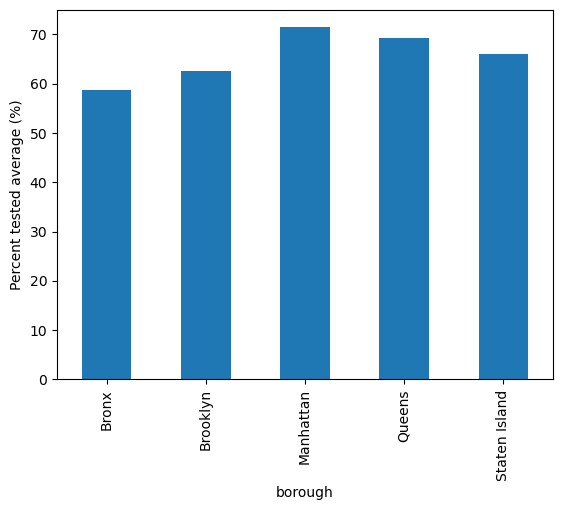

In [8]:
per_test_mean.plot(kind='bar')
plt.ylabel('Percent tested average (%)') 
plt.show()

In [9]:
df_clean=schools.copy(deep=True)
for i in range(len(df_clean)):
   if df_clean.iloc[i].isna().any():
        boro=df_clean.iloc[i,1]
        value_avg=per_test_mean[boro]
        df_clean.iloc[i,-1]=value_avg

print('Empty values in "Schools" DataFrame: '+str(schools.isna().any().any()))
print('Empty values in cleaned DataFrame: '+str(df_clean.isna().any().any()))

Empty values in "Schools" DataFrame: True
Empty values in cleaned DataFrame: False


## Data Analysis

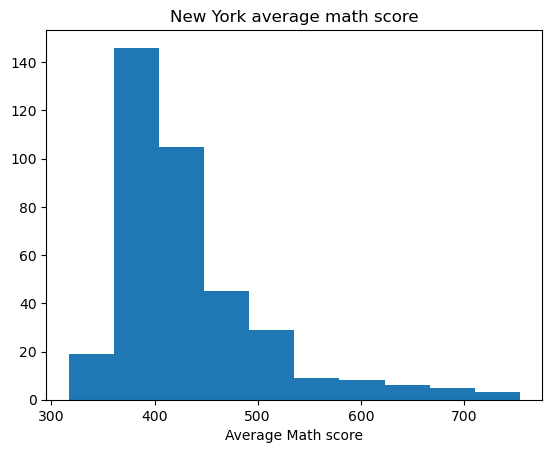

In [10]:
schools['average_math'].hist(grid=False)
plt.xlabel('Average Math score')
plt.title('New York average math score')
plt.show()

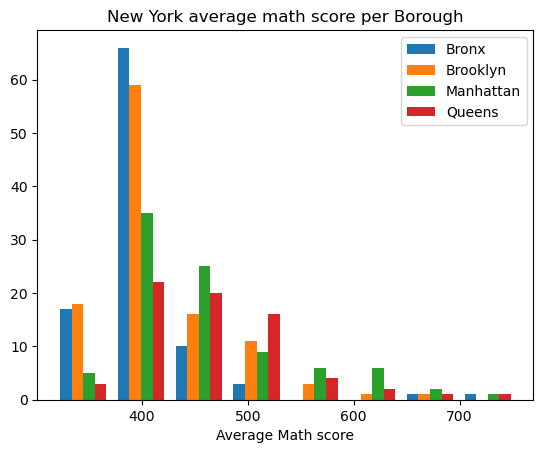

In [11]:
x1=df_clean[df_clean['borough']=='Bronx']['average_math']
x2=df_clean[df_clean['borough']=='Brooklyn']['average_math']
x3=df_clean[df_clean['borough']=='Manhattan']['average_math']
x4=df_clean[df_clean['borough']=='Queens']['average_math']
x5=df_clean[df_clean['borough']=='State Island']['average_math']
plt.hist([x1,x2,x3,x4],bins=8,stacked=False,histtype='bar' )
plt.xlabel('Average Math score')
plt.title('New York average math score per Borough')
plt.legend(['Bronx','Brooklyn','Manhattan','Queens','St Island'])
plt.show()

* For the requests of DataCamp, only the ``school_name``, 	``borough``, ``average_reading``, 	``average_writing``and ``average_math`` are required.

* Therefore, columns ``building_code``	 and 	``percent_tested`` will be removed.

In [12]:
df_clean=schools.drop(['building_code','percent_tested'],axis=1)
df_clean.head()

,school_name,borough,average_math,average_reading,average_writing
0,"New Explorations into Science, Technology and ...",Manhattan,657,601,601
1,Essex Street Academy,Manhattan,395,411,387
2,Lower Manhattan Arts Academy,Manhattan,418,428,415
3,High School for Dual Language and Asian Studies,Manhattan,613,453,463
4,Henry Street School for International Studies,Manhattan,410,406,381


### <a id=id_1>Which NYC schools have the best math results? </a>
* The best math results are at least 80% of the ***maximum possible score of 800*** for math.
* Save your results in a pandas DataFrame called ***``best_math_schools``***, including:
    * ``"school_name"`` and
    * ``"average_math"`` columns,
    * sorted by ``"average_math"`` in **descending order**.

In [13]:
threshold = 800*.8
print(threshold)

640.0


In [14]:
best_math_schools=df_clean[['school_name','average_math']][df_clean['average_math']>=threshold].sort_values('average_math',ascending=False)
best_math_schools.reset_index(drop=True,inplace=True)

In [15]:
best_math_schools.head(16)

,school_name,average_math
0,Stuyvesant High School,754
1,Bronx High School of Science,714
2,Staten Island Technical High School,711
3,Queens High School for the Sciences at York Co...,701
4,"High School for Mathematics, Science, and Engi...",683
5,Brooklyn Technical High School,682
6,Townsend Harris High School,680
7,High School of American Studies at Lehman College,669
8,"New Explorations into Science, Technology and ...",657
9,Eleanor Roosevelt High School,641


### <a id=id_2>What are the top 10 performing schools based on the combined SAT scores?</a>
* Save your results as a pandas DataFrame called ***top_10_schools*** containing:
    * ``"school_name"`` and
    * a new column named ``"total_SAT"``,
    * with results ordered by ``"total_SAT"`` in descending order.

In [16]:
# df_clean['total_SAT']=df_clean[['average_math','average_reading','average_writing']].mean(axis=1).round(2) # Mean of scores or ...
df_clean['total_SAT']=df_clean[['average_math','average_reading','average_writing']].sum(axis=1).round(2) # Adding scores?
top_10_schools=df_clean[['school_name','total_SAT']].sort_values('total_SAT',ascending=False).iloc[:10]
top_10_schools.reset_index(drop=True,inplace=True)

In [17]:
top_10_schools.head(15)

,school_name,total_SAT
0,Stuyvesant High School,2144
1,Bronx High School of Science,2041
2,Staten Island Technical High School,2041
3,High School of American Studies at Lehman College,2013
4,Townsend Harris High School,1981
5,Queens High School for the Sciences at York Co...,1947
6,Bard High School Early College,1914
7,Brooklyn Technical High School,1896
8,Eleanor Roosevelt High School,1889
9,"High School for Mathematics, Science, and Engi...",1889


### <a id=id_3>Which single borough has the largest standard deviation in the combined SAT score? </a>
* Save your results as a pandas DataFrame called ***largest_std_dev***.
* The DataFrame should contain one row, with:
    * ``"borough"`` - the name of the NYC borough with the largest standard deviation of ``"total_SAT"``.
    * ``"num_schools"`` - the number of schools in the borough.
    * ``"average_SAT"`` - the mean of "total_SAT".
    * ``"std_SAT"`` - the standard deviation of ``"total_SAT"``.

In [18]:
df_boro=df_clean.groupby('borough')
df_boro_size=df_boro.size()

In [19]:
df_boro_avg=df_boro['total_SAT'].mean().round(2)

In [20]:
df_boro_std=df_boro['total_SAT'].std().round(2)
std_max=df_boro_std.max()

In [21]:
for boro in schools['borough'].unique():
    if df_boro_std[boro]==std_max:
        largest_std_dev=pd.DataFrame({'borough':[boro],'num_schools':[df_boro_size[boro]],'average_SAT':[df_boro_avg[boro]],'std_SAT':[df_boro_std[boro]]})
        

In [22]:
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29
